##### Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [7]:
from google.colab import files
 
 
uploaded = files.upload()

Saving CC_GENERAL.csv to CC_GENERAL.csv


In [8]:
import io
creditcard_df = pd.read_csv(io.BytesIO(uploaded['CC_GENERAL.csv']))
print(creditcard_df)

     CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0     C10001    40.900749  ...          0.000000      12
1     C10002  3202.467416  ...          0.222222      12
2     C10003  2495.148862  ...          0.000000      12
3     C10004  1666.670542  ...          0.000000      12
4     C10005   817.714335  ...          0.000000      12
...      ...          ...  ...               ...     ...
8945  C19186    28.493517  ...          0.500000       6
8946  C19187    19.183215  ...          0.000000       6
8947  C19188    23.398673  ...          0.250000       6
8948  C19189    13.457564  ...          0.250000       6
8949  C19190   372.708075  ...          0.000000       6

[8950 rows x 18 columns]


In [39]:
creditcard_df = pd.read_csv('CC_GENERAL.csv')

In [40]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [41]:
creditcard_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [42]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [43]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [44]:
# To see who made maximum one off purchase of $40761.25
creditcard_df[creditcard_df['ONEOFF_PURCHASES']== 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [45]:
# See who made cash advance of $47137
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### Exploratory Data Analysis and Data Cleaning

In [46]:
# Check for any missing data
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [47]:
# Fill up the missing data in Minimum Payments with mean
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [48]:
#Fill missing values in CREDIT_LIMIT with mean
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()) == True,'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [49]:
# To check for duplicate values in data
creditcard_df.duplicated().sum()

0

In [50]:
# Drop customer ID column
creditcard_df.drop('CUST_ID', axis = 1, inplace=True)

In [52]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


C:\Users\vamsi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vamsi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vamsi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

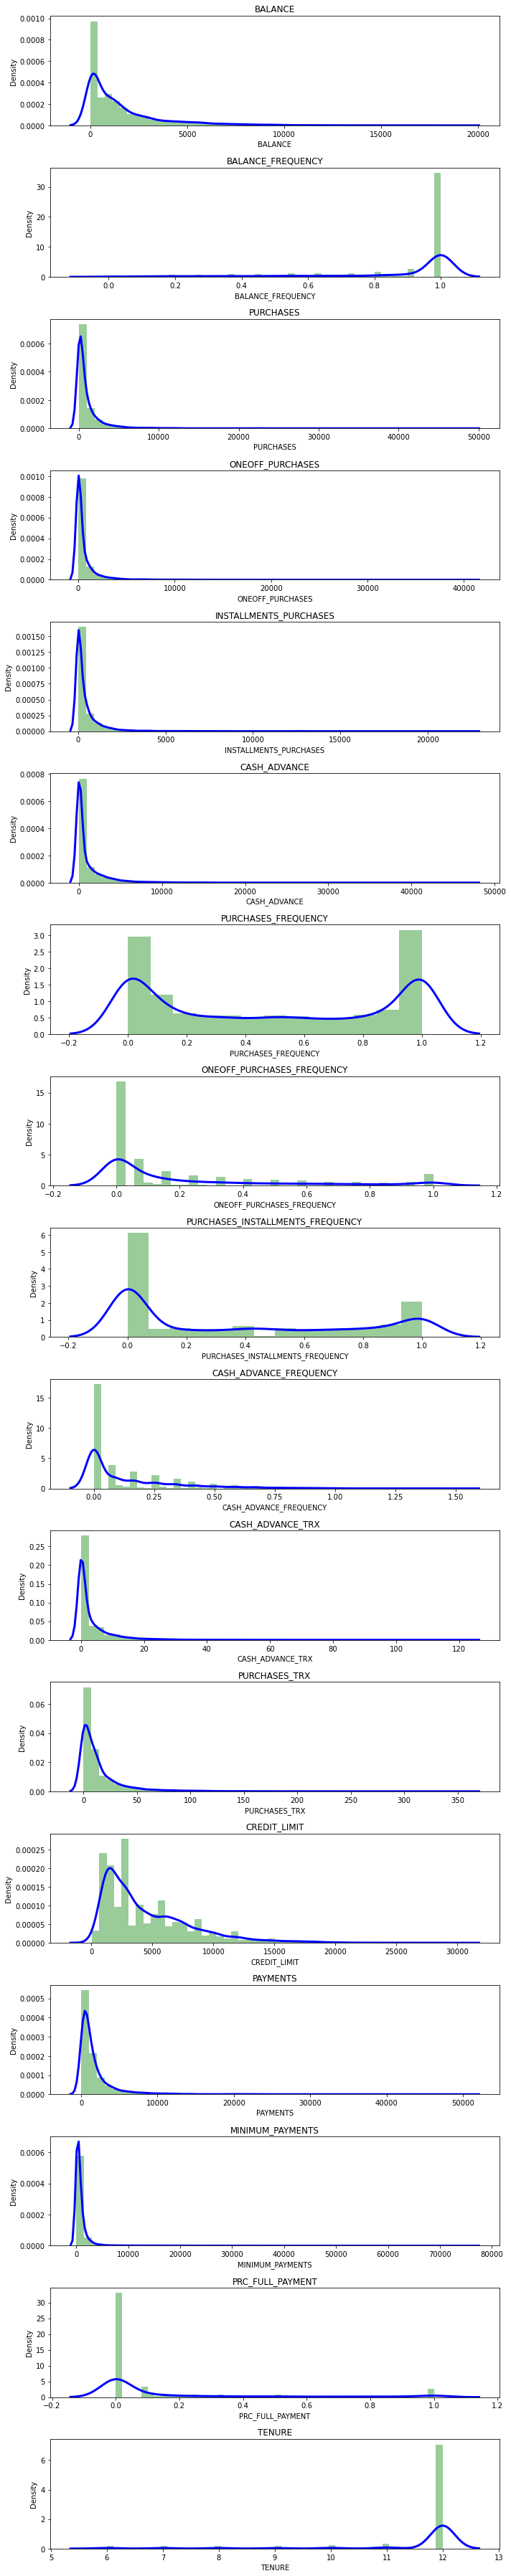

In [54]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [55]:
corr = creditcard_df.corr()

In [56]:
corr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


<AxesSubplot:>

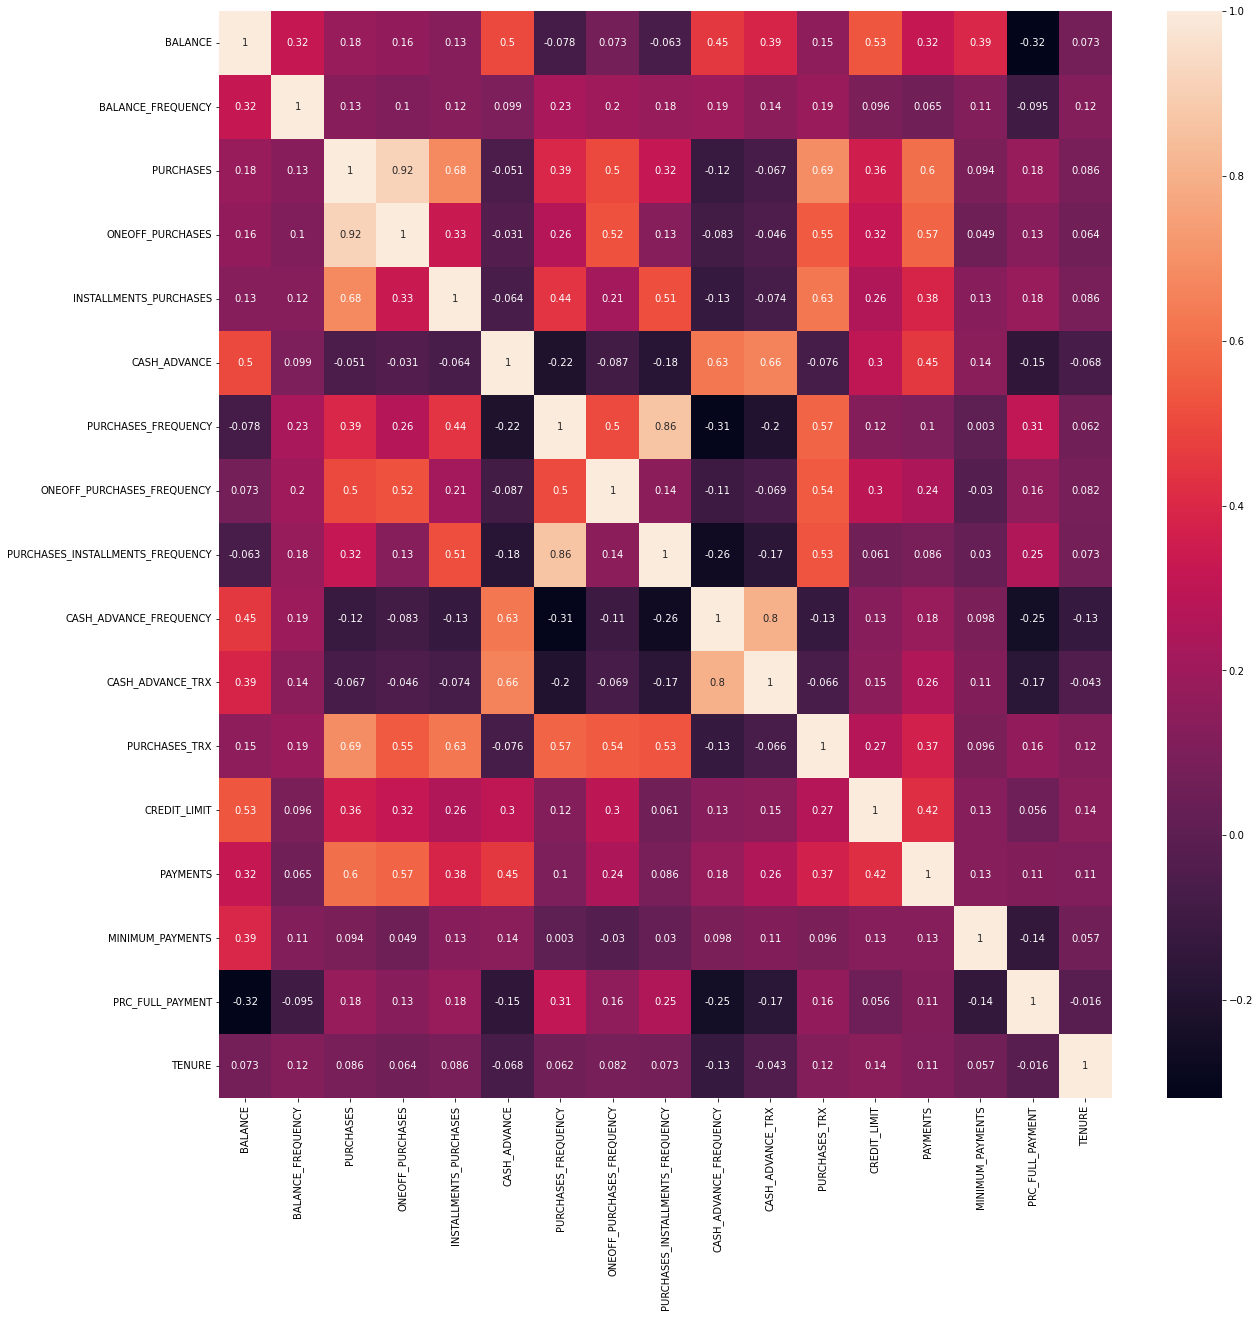

In [57]:
# Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

### Emperial Analysis

In [58]:
# Scaling the data
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [59]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

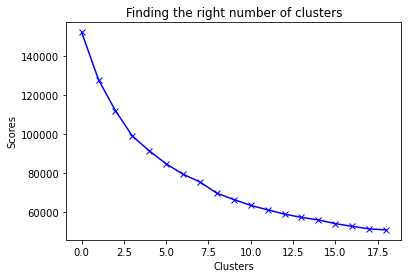

In [60]:
# Elbow Method

scores_1 = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    scores_1 .append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

In [61]:
# Let's choose number of clusters as 9
kmeans = KMeans(9)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [62]:
kmeans.cluster_centers_

array([[-3.69980271e-01,  3.31341915e-01, -3.42669738e-02,
        -2.42075861e-01,  3.63525705e-01, -3.61848035e-01,
         9.96254353e-01, -3.83037231e-01,  1.20830219e+00,
        -4.72159107e-01, -3.59413719e-01,  1.88864944e-01,
        -2.58886311e-01, -2.14550839e-01, -9.36860767e-02,
         3.23126771e-01,  2.55481762e-01],
       [ 1.63911127e+00,  3.95249971e-01, -2.27664723e-01,
        -1.61772558e-01, -2.41168087e-01,  1.99120679e+00,
        -4.88711000e-01, -2.14223742e-01, -4.27721418e-01,
         1.93027133e+00,  1.92043745e+00, -2.75530530e-01,
         1.00117626e+00,  7.89814862e-01,  3.78390125e-01,
        -3.94341189e-01,  7.30844605e-02],
       [ 1.29917102e+00,  4.55852609e-01, -5.13713328e-02,
        -2.71244355e-01,  3.76157154e-01, -1.03636621e-02,
        -1.11582855e-02, -5.32469410e-01,  2.30335859e-01,
        -2.41517646e-01, -6.02246468e-02,  1.97607731e-01,
         6.35390809e-03, -9.21200377e-02,  1.14846209e+01,
        -5.25550971e-01,  3.0

In [63]:
kmeans.cluster_centers_.shape

(9, 17)

In [64]:
kmeans.labels_

array([8, 1, 4, ..., 7, 7, 7])

In [65]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.369980,0.331342,-0.034267,-0.242076,0.363526,-0.361848,0.996254,-0.383037,1.208302,-0.472159,-0.359414,0.188865,-0.258886,-0.214551,-0.093686,0.323127,0.255482
1,1.639111,0.395250,-0.227665,-0.161773,-0.241168,1.991207,-0.488711,-0.214224,-0.427721,1.930271,1.920437,-0.275531,1.001176,0.789815,0.378390,-0.394341,0.073084
2,1.299171,0.455853,-0.051371,-0.271244,0.376157,-0.010364,-0.011158,-0.532469,0.230336,-0.241518,-0.060225,0.197608,0.006354,-0.092120,11.484621,-0.525551,0.300092
3,-0.701631,-2.147253,-0.310468,-0.235101,-0.302060,-0.319530,-0.555628,-0.444067,-0.439470,-0.520713,-0.376018,-0.419473,-0.175017,-0.192287,-0.256414,0.286611,0.199696
4,-0.131305,0.399710,0.537405,0.665427,0.047994,-0.329089,0.981533,1.902692,0.174738,-0.412038,-0.330319,0.618484,0.434978,0.145997,-0.157056,0.448929,0.268609
5,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
6,1.032295,0.464077,2.506657,1.831146,2.562869,-0.153599,1.159844,1.575497,1.262411,-0.276586,-0.143483,3.104400,1.307273,1.452832,0.379882,0.250603,0.337591
7,-0.333924,-0.345996,-0.288199,-0.214424,-0.287144,0.067515,-0.203348,-0.286554,-0.225256,0.309069,0.000876,-0.387867,-0.563134,-0.392745,-0.209087,0.013378,-3.200691
8,0.003309,0.402506,-0.356125,-0.240982,-0.399214,-0.106401,-0.846919,-0.391115,-0.751204,0.084781,-0.042317,-0.480496,-0.308581,-0.254479,-0.045631,-0.455917,0.274122


In [67]:
# Scale the data back to original representation

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=creditcard_df.columns)
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.655025e+06,1.103682,1.987947e+06,3.170175e+05,6.694025e+05,4.624526e+05,0.847629,0.228767,0.700122,0.143281,8.681571,497.028380,1.293000e+07,3.220981e+06,1.506049e+06,0.226316,27.387989
1,1.035899e+07,1.107268,1.105145e+06,5.382467e+05,1.749226e+05,1.081026e+07,0.608430,0.243790,0.441717,0.239484,114.855606,210.109216,2.961073e+07,1.163802e+07,4.069911e+06,0.164939,27.061328
2,8.886274e+06,1.110669,1.909871e+06,2.366606e+05,6.797317e+05,2.008142e+06,0.685355,0.215468,0.545655,0.152517,22.614986,502.429968,1.644125e+07,4.247007e+06,6.438822e+07,0.153715,27.467883
3,2.182161e+05,0.964590,7.271713e+05,3.362327e+05,1.251288e+05,6.485516e+05,0.597651,0.223335,0.439861,0.141336,7.908313,121.176427,1.404027e+07,3.407563e+06,6.222697e+05,0.223192,27.288081
4,2.689037e+06,1.107519,4.597456e+06,2.817116e+06,4.113808e+05,6.065160e+05,0.845258,0.432184,0.536873,0.145688,10.036534,762.461601,2.211539e+07,6.242539e+06,1.161885e+06,0.237078,27.411498
5,1.125230e+07,1.104201,5.827737e+07,3.631210e+07,4.882896e+06,3.252195e+06,0.855187,0.453750,0.650915,0.146956,20.309490,3195.275483,5.852224e+07,8.084371e+07,7.613703e+06,0.303234,27.464869
6,7.730088e+06,1.111131,1.358650e+07,6.028577e+06,2.467885e+06,1.378249e+06,0.873980,0.403065,0.708668,0.151112,18.737609,2298.343844,3.366284e+07,1.719441e+07,4.078013e+06,0.220112,27.535040
7,1.811233e+06,1.065672,8.288253e+05,3.931966e+05,1.373263e+05,2.350620e+06,0.654397,0.237353,0.473696,0.174564,25.460499,140.703986,8.902355e+06,1.727634e+06,8.793003e+05,0.199818,21.198228
8,3.272223e+06,1.107676,5.187626e+05,3.200301e+05,4.568291e+04,1.585809e+06,0.550730,0.228048,0.390624,0.165583,23.448953,83.474567,1.227214e+07,2.886368e+06,1.767037e+06,0.159672,27.421373


In [68]:
labels.shape

(8950,)

In [70]:
# Concatenate the cluster labels back to original dataframe
creditcard_df_cluster = pd.concat([creditcard_df,pd.DataFrame({'cluster':labels})], axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,8
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,8
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,8


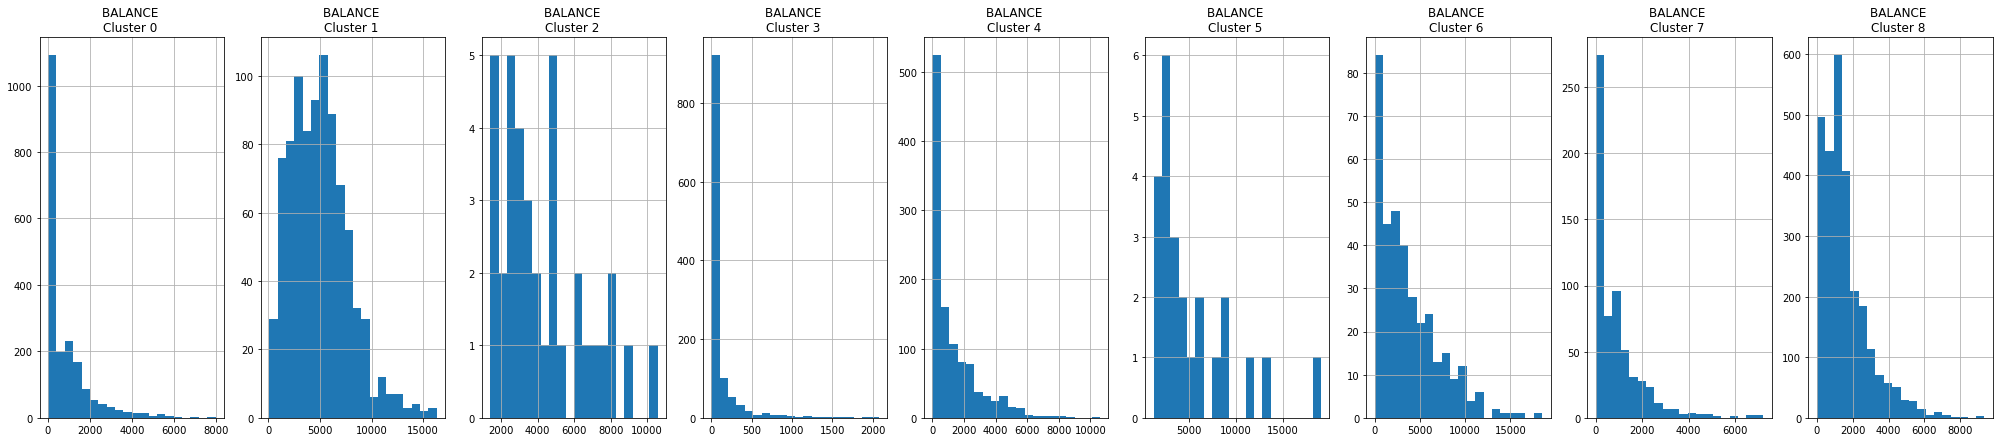

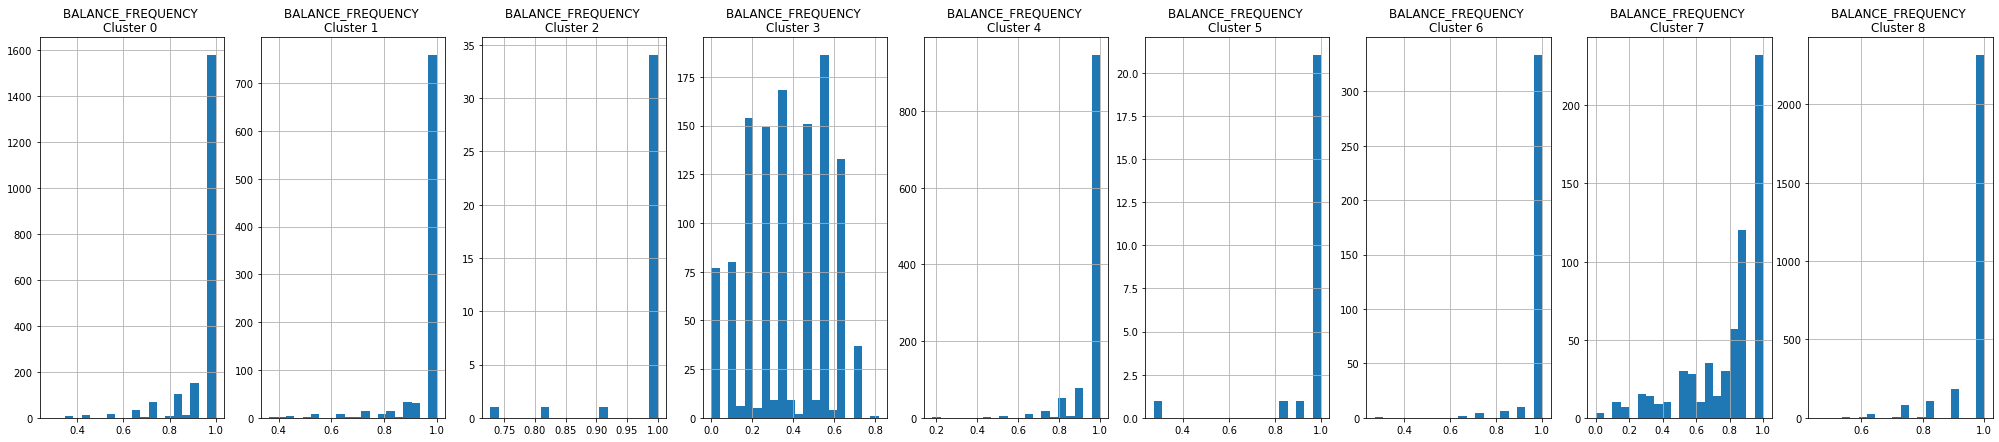

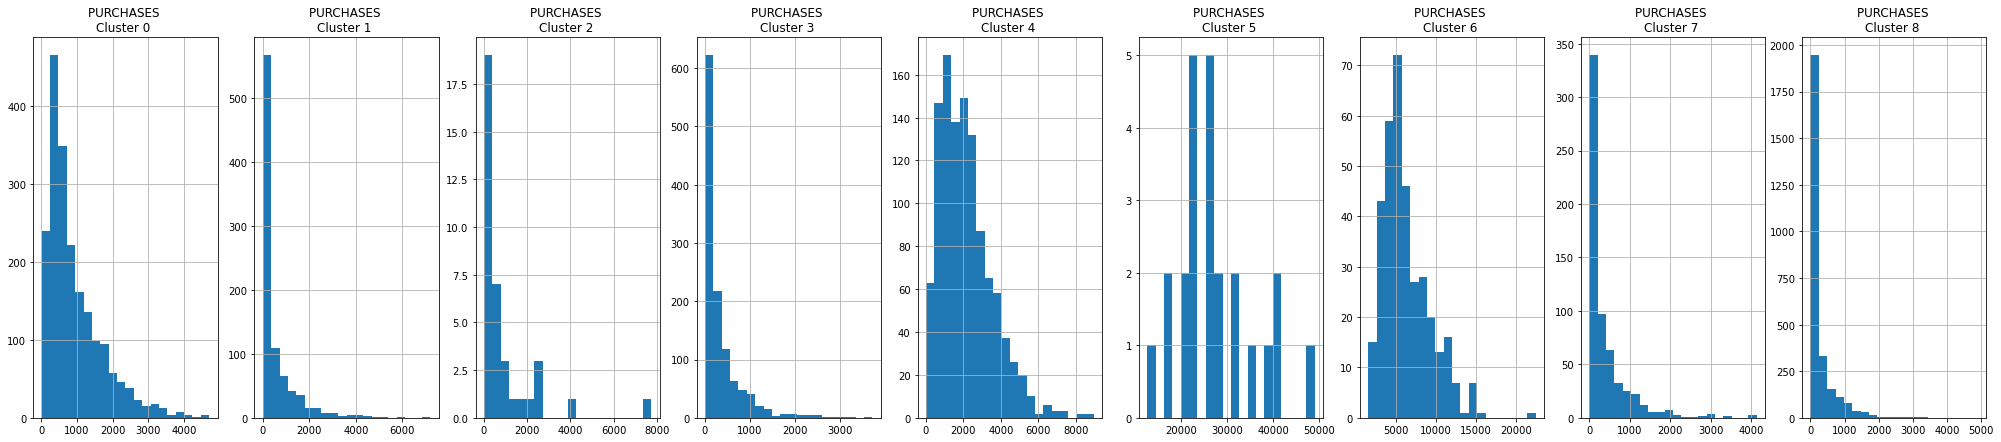

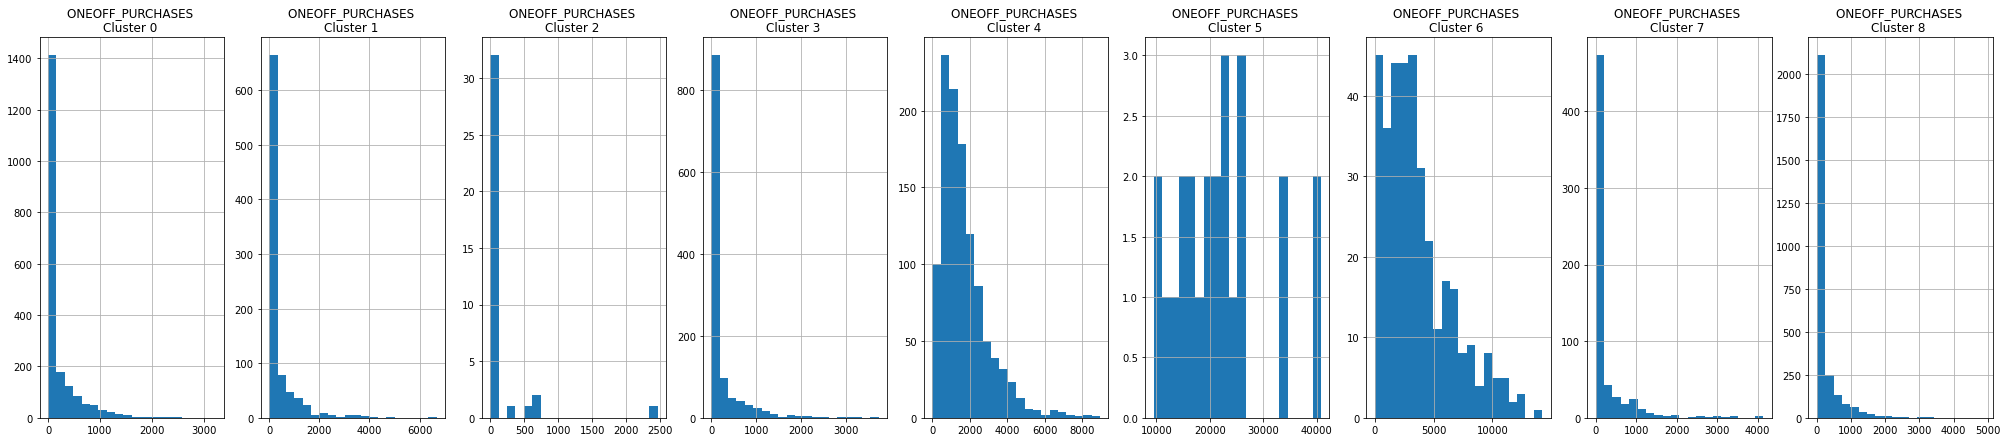

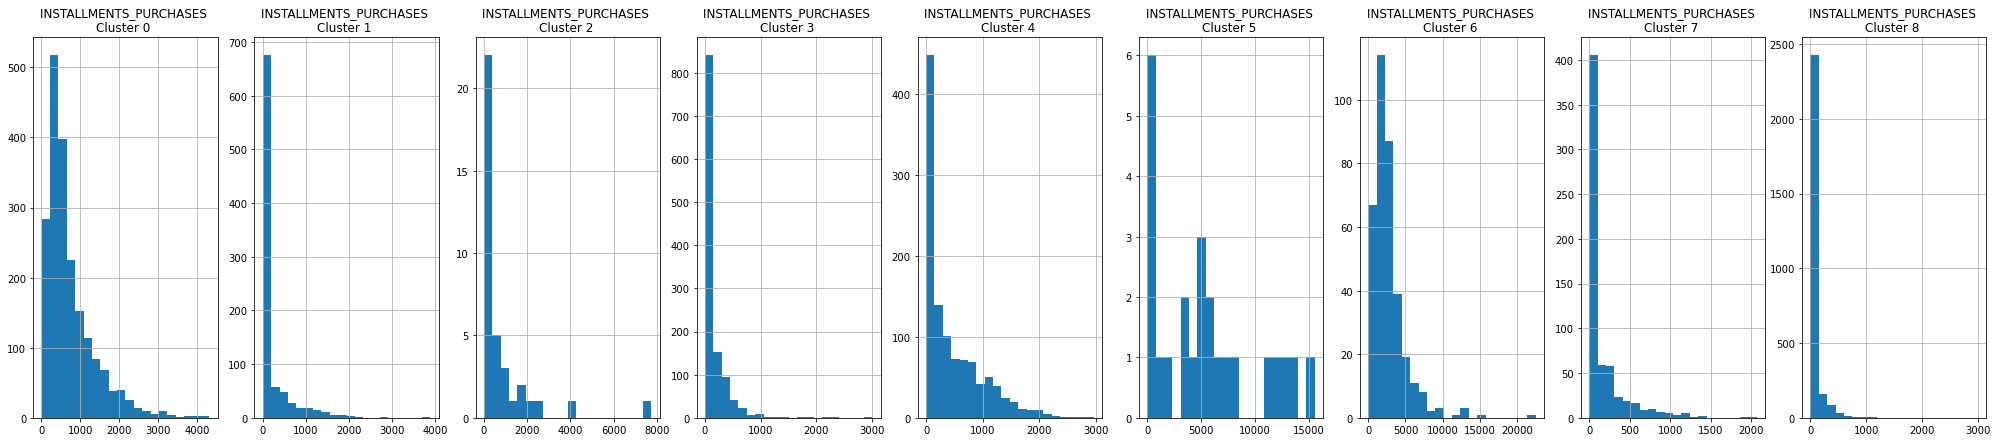

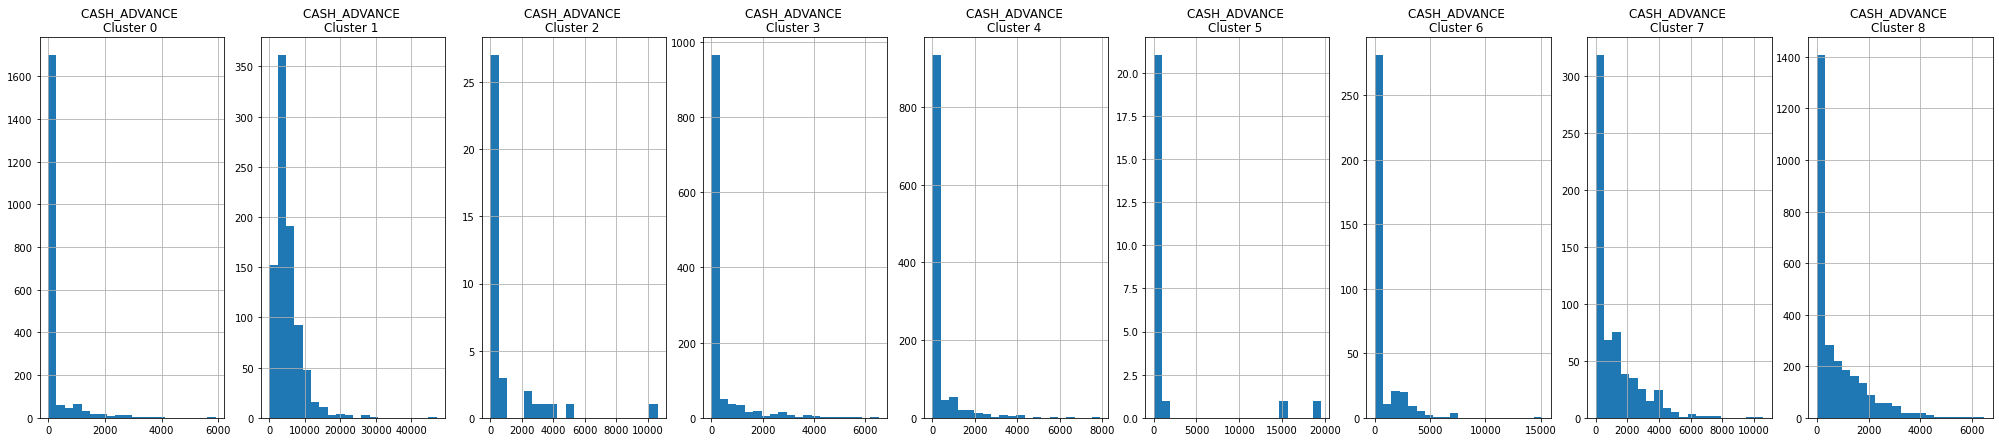

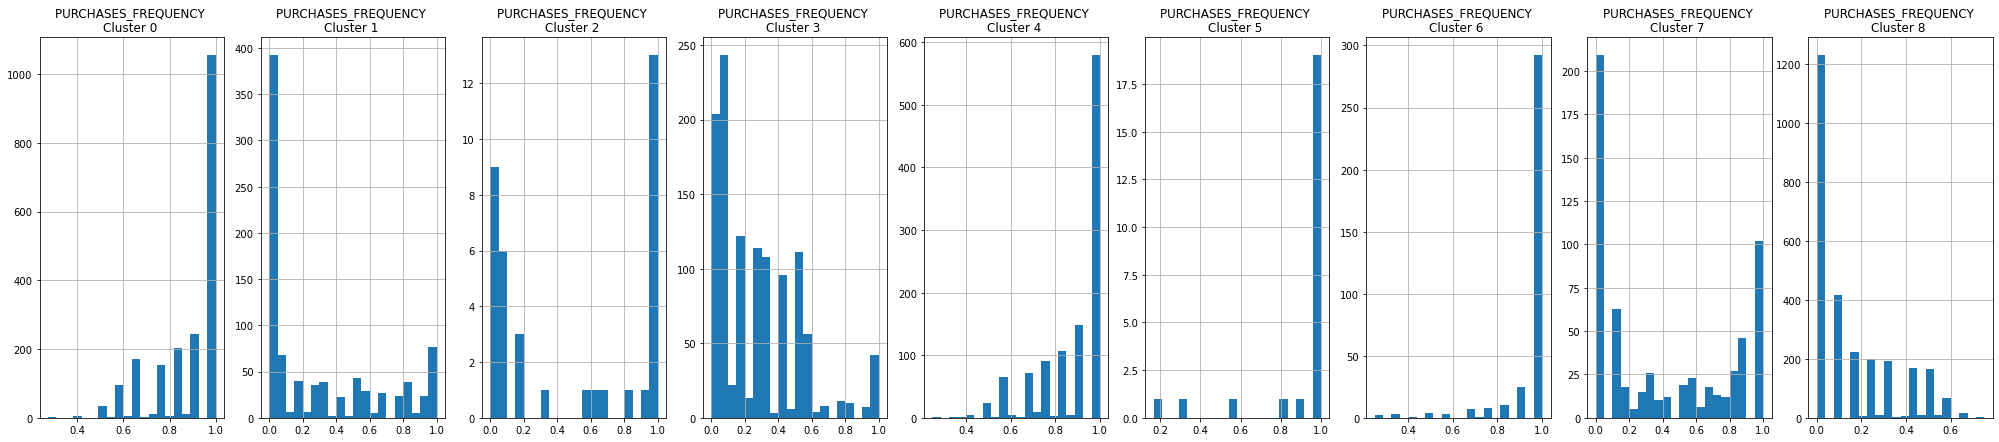

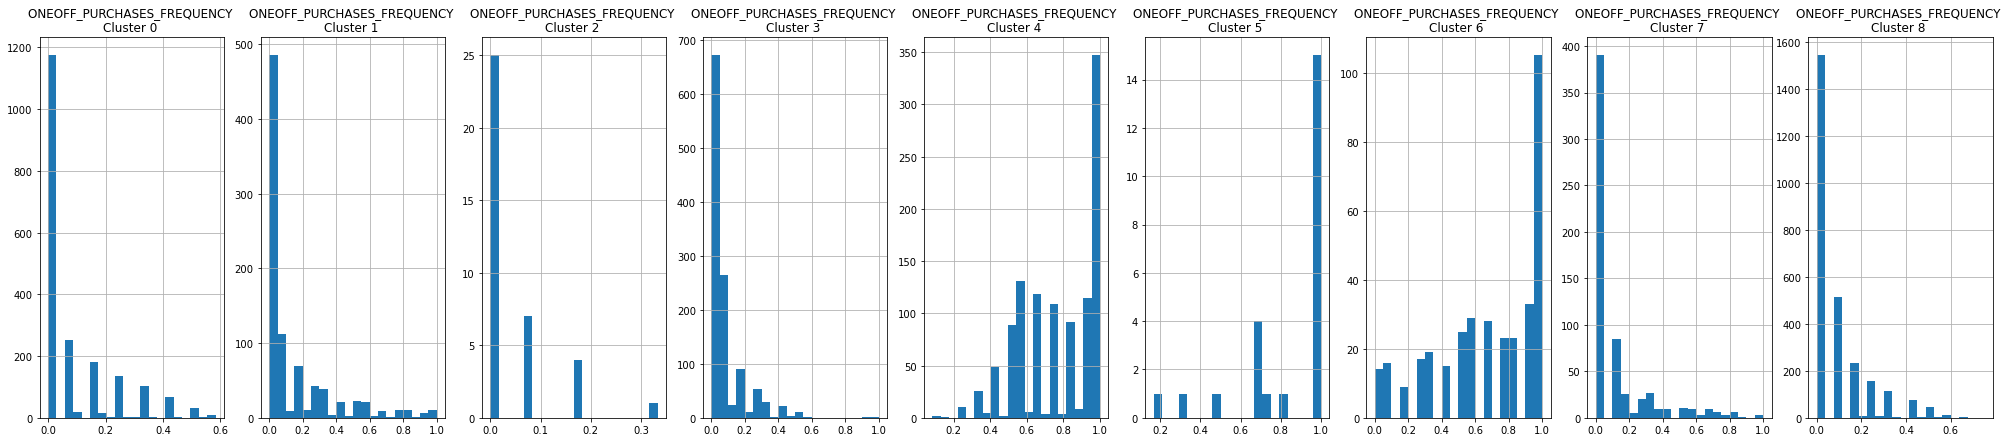

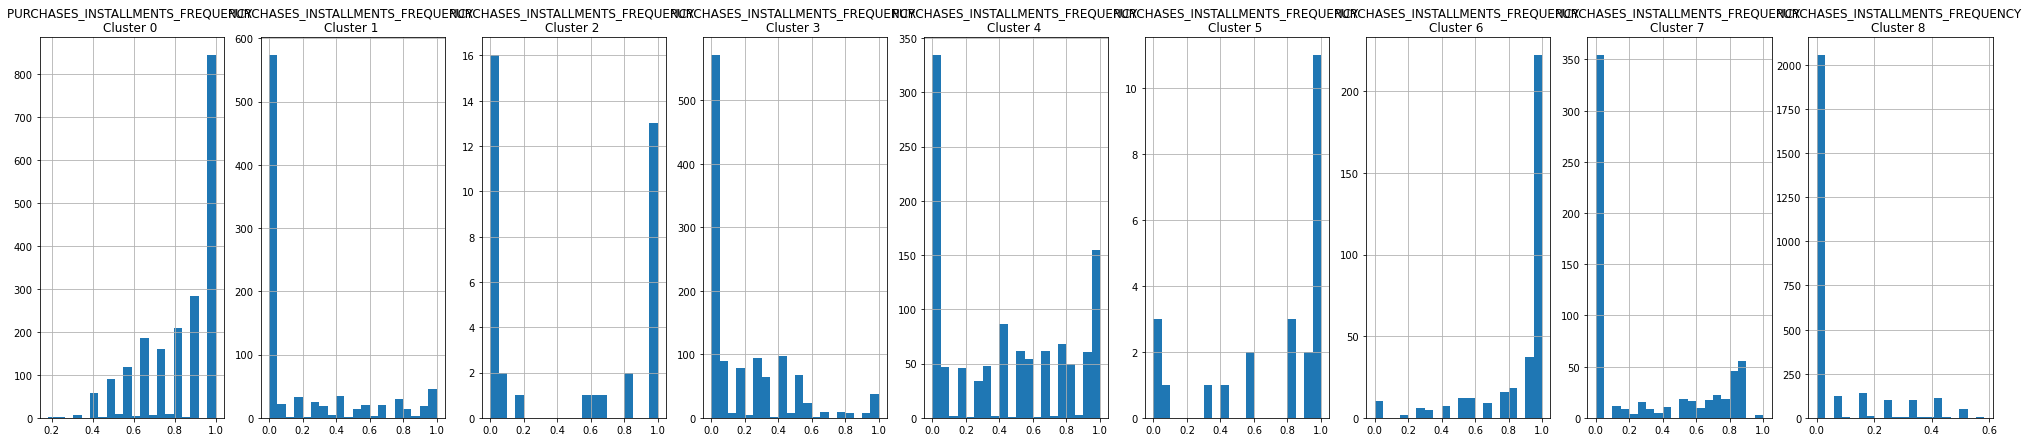

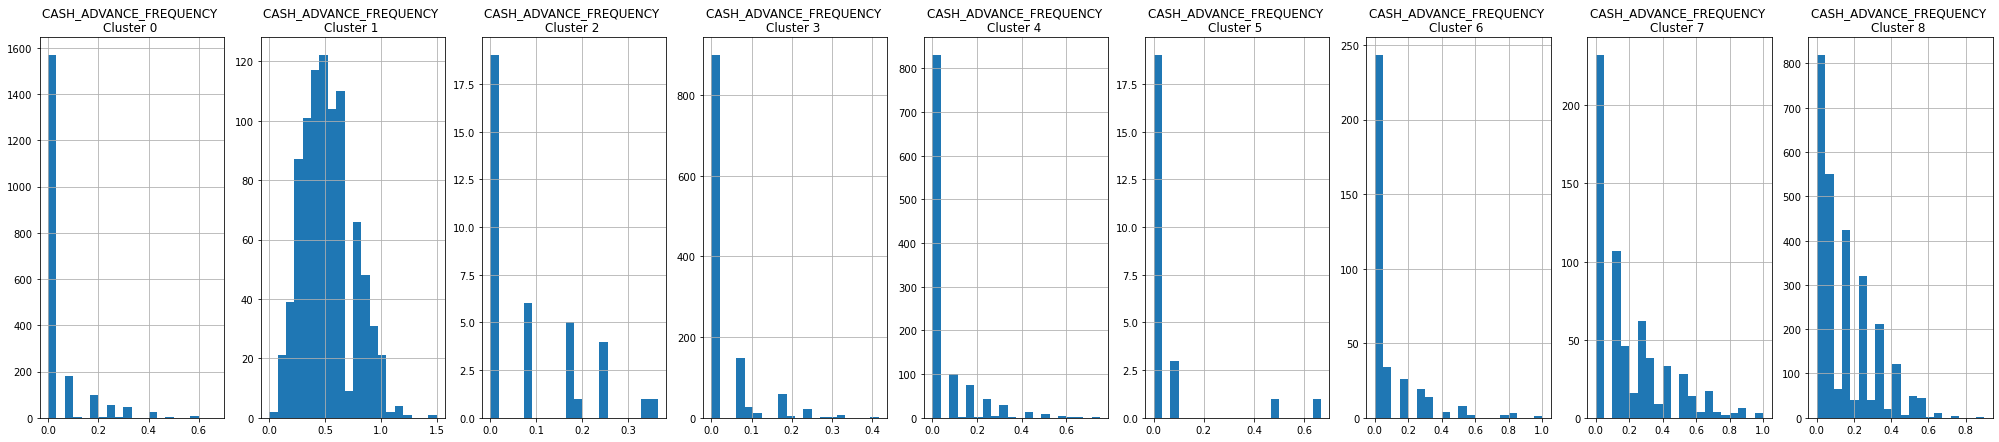

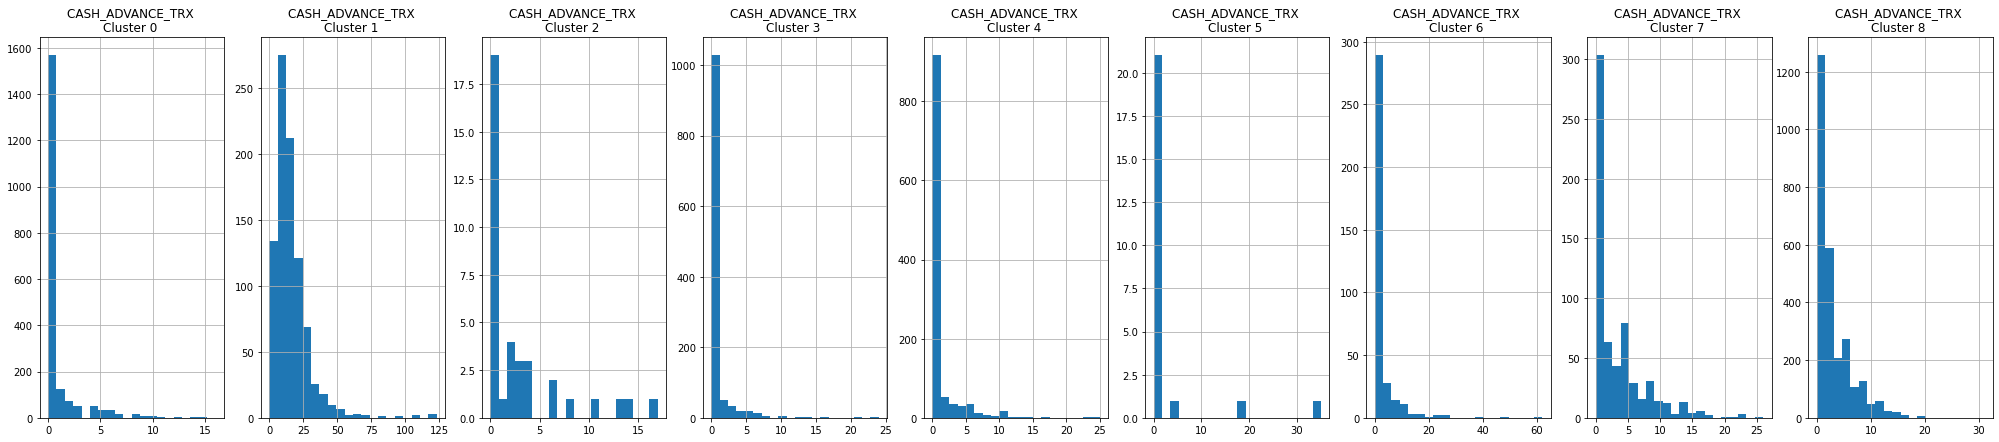

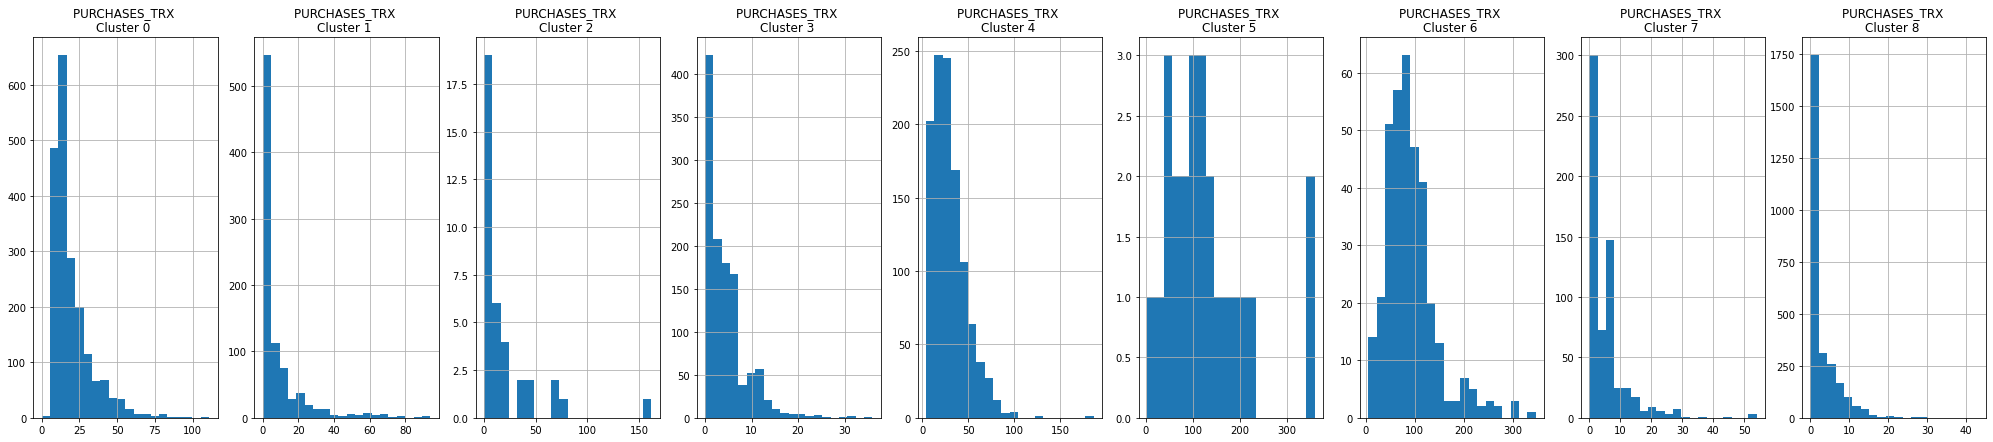

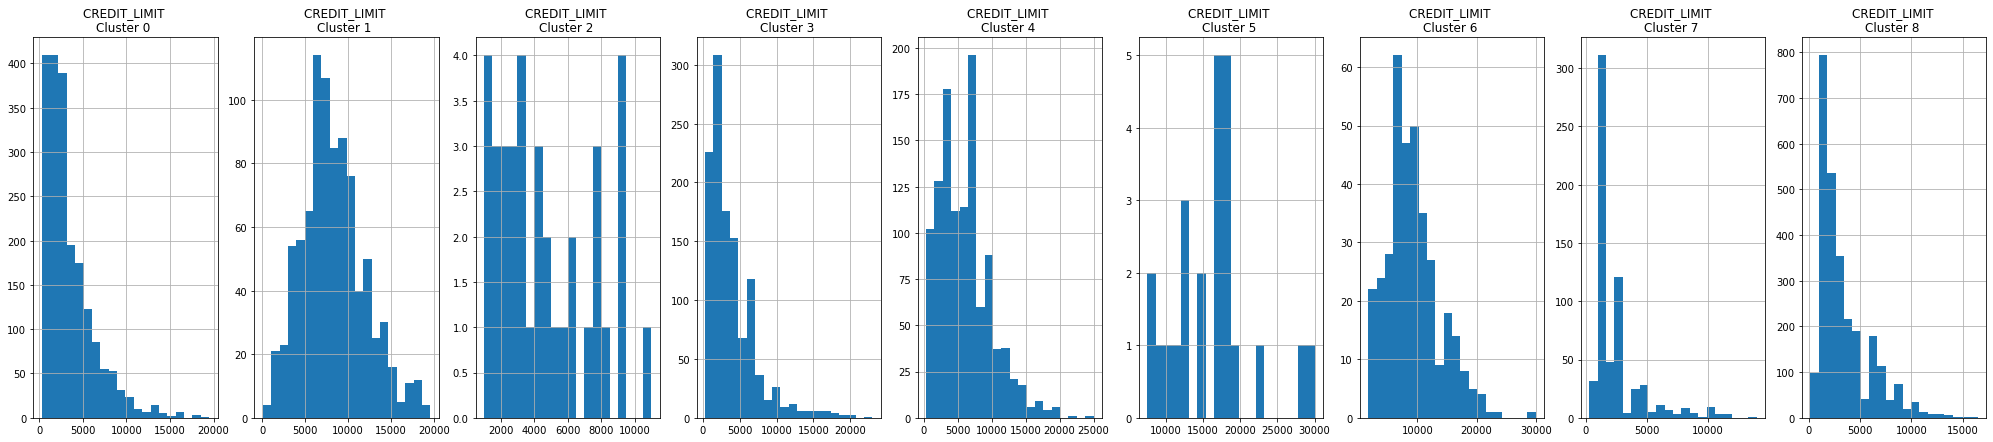

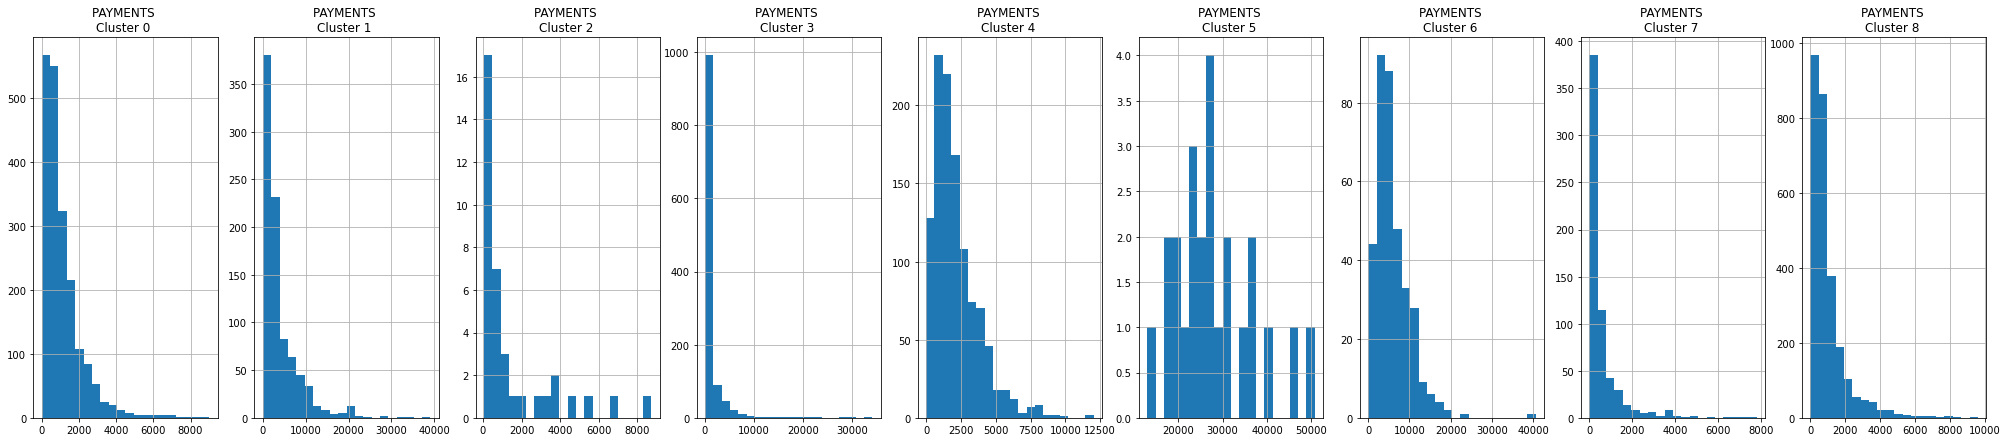

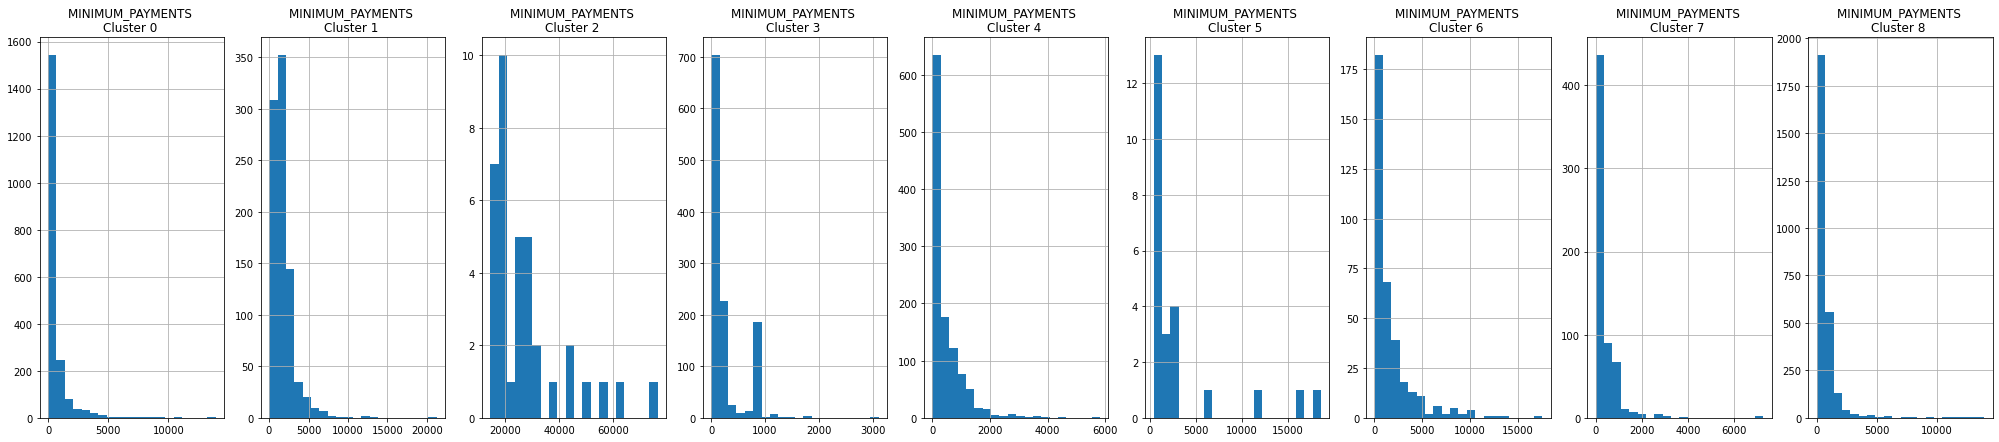

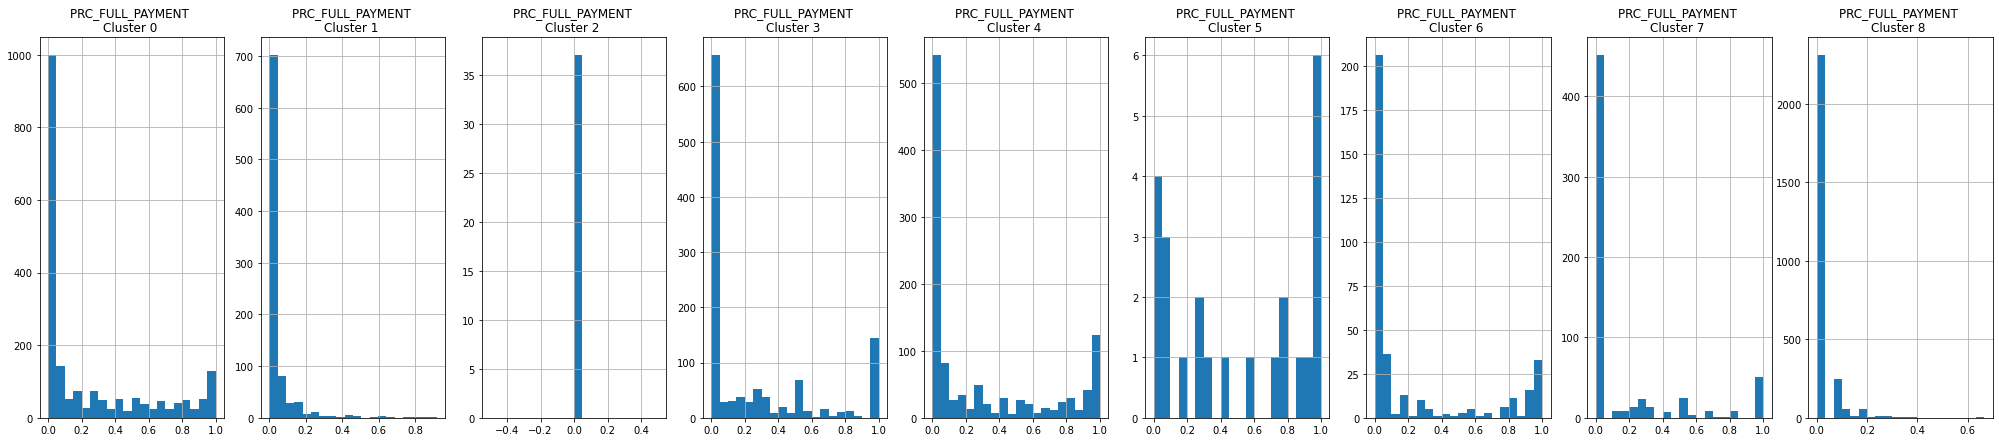

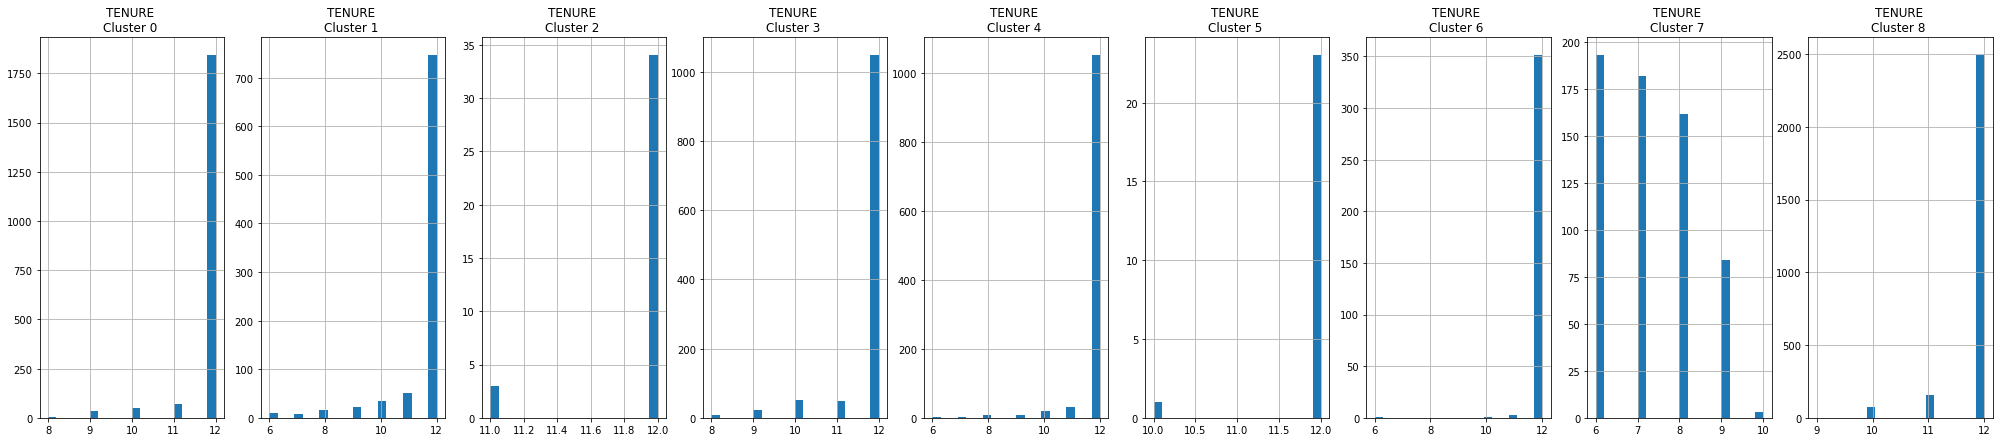

In [82]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35,7))
    for j in range(9):
        plt.subplot(1,9,j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {} '.format(i,j))

plt.show()

In [83]:
# Apply principal component analysis (to see how this cluster look like when features are reduced)
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.6822192 , -1.07645819],
       [-1.13829   ,  2.50643098],
       [ 0.96968272, -0.38352306],
       ...,
       [-0.92620428, -1.81077608],
       [-2.3365525 , -0.65794946],
       [-0.55642439, -0.40045014]])

In [84]:
# Create DataFrame of two components
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076458
1,-1.138290,2.506431
2,0.969683,-0.383523
3,-0.873626,0.043150
4,-1.599433,-0.688582


In [85]:
# Concatenate cluster labels
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076458,8
1,-1.138290,2.506431,1
2,0.969683,-0.383523,4
3,-0.873626,0.043150,8
4,-1.599433,-0.688582,8


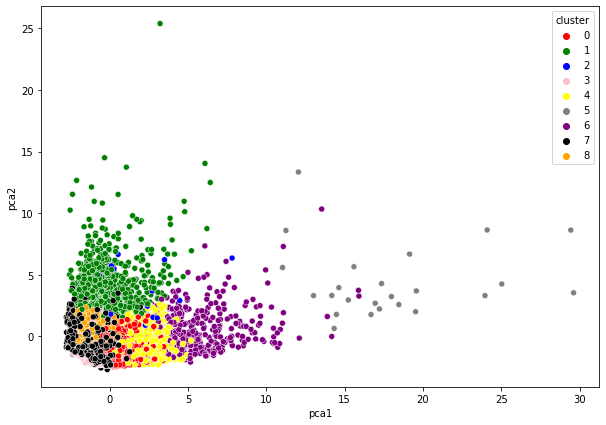

In [88]:
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x='pca1',y='pca2',data=pca_df,hue='cluster',palette =['red','green','blue','pink','yellow','gray','purple', 'black','orange'])
plt.show()

In [90]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

In [91]:
input_df = Input(shape=(17,))
# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 
x = Dense(7, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

In [92]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [93]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs=25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 3s 28ms/step - loss: 0.5483
Epoch 2/25
70/70 [==============================] - 2s 28ms/step - loss: 0.3111
Epoch 3/25
70/70 [==============================] - 2s 29ms/step - loss: 0.2321
Epoch 4/25
70/70 [==============================] - 2s 30ms/step - loss: 0.1911
Epoch 5/25
70/70 [==============================] - 2s 31ms/step - loss: 0.1626
Epoch 6/25
70/70 [==============================] - 2s 30ms/step - loss: 0.1508
Epoch 7/25
70/70 [==============================] - 2s 30ms/step - loss: 0.1453
Epoch 8/25
70/70 [==============================] - 2s 28ms/step - loss: 0.1264
Epoch 9/25
70/70 [==============================] - 2s 28ms/step - loss: 0.1249
Epoch 10/25
70/70 [==============================] - 2s 28ms/step - loss: 0.1098
Epoch 11/25
70/70 [==============================] - 2s 27ms/step - loss: 0.1016
Epoch 12/25
70/70 [==============================] - 2s 28ms/step - loss: 0.1027
Epoch 13/25
70/70 [==================

In [94]:
pred = encoder.predict(creditcard_df_scaled)

In [96]:
pred.shape
# Features reduced from 17 to 10 (Dimentionality reduction)

(8950, 10)

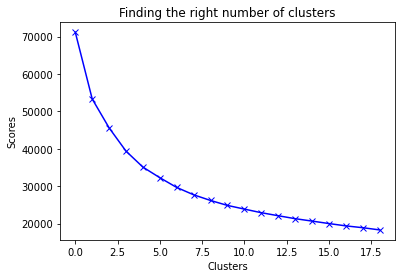

In [97]:
# Elbow method (to know no. of clusters before applying kmeans)
scores_2 = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)
    
plt.plot(scores_2, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()


C:\Users\vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  """Entry point for launching an IPython kernel.
C:\Users\vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  


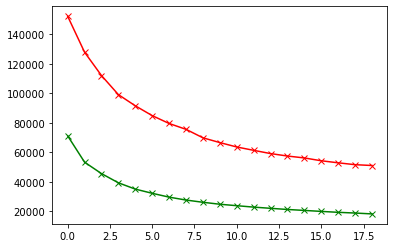

In [98]:
plt.plot(scores_1,'bx-',color = 'r')
plt.plot(scores_2,'bx-',color = 'g')

In [99]:
# Apply Kmeans for after features reduce to 10
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [100]:
df_cluster_dr = pd.concat([creditcard_df,pd.DataFrame({'cluster':labels})],axis=1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [103]:
# Apply PCA after dimension reduced to 10
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.725491,-0.071242
1,1.769850,-1.841617
2,-1.097252,0.864846
3,-0.568481,0.072441
4,-1.870531,-0.135661


In [104]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.725491,-0.071242,2
1,1.769850,-1.841617,1
2,-1.097252,0.864846,2
3,-0.568481,0.072441,2
4,-1.870531,-0.135661,2


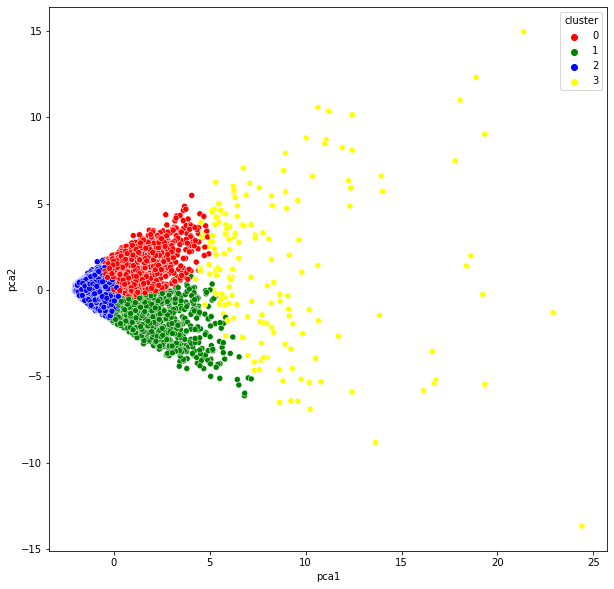

In [105]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1',y='pca2',data=pca_df,hue = 'cluster',palette=['red','green','blue','yellow'])
plt.show()